<a href="https://colab.research.google.com/github/bipulsimkhada/Image-Compression/blob/main/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.11.0'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

### Visualizing the images

In [ ]:
np.random.randint(0, 59999)

43346

4


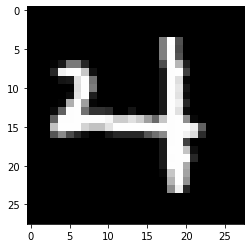

In [ ]:
i = np.random.randint(0,5999)
print(y_train[i])
plt.imshow(X_train[i], cmap ='gray')

In [ ]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

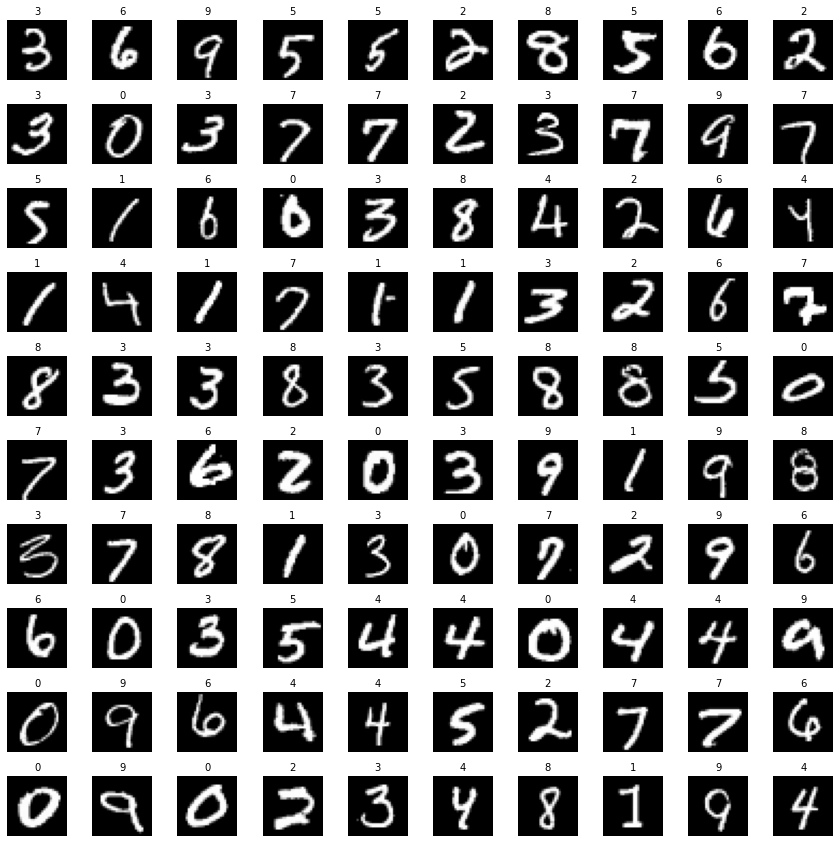

In [ ]:
width = 10
height = 10
fig,axes = plt.subplots(height, width, figsize =(15,15))
axes = axes.ravel()
for i in np.arange(0,width * height):
  index = np.random.randint(0,59999)
  axes[i].imshow(X_train[index],cmap='gray')
  axes[i].set_title(y_train[index],fontsize=10)
  axes[i].axis('off')
  plt.subplots_adjust(hspace=0.4)


### Pre-processing the images

In [ ]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0].min(),X_train[0].max()

(0.0, 1.0)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train.shape[0],X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_train.shape


(60000, 784)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the autoencoder

In [ ]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [ ]:
autoencoder = Sequential()

#Encode
autoencoder.add(Dense(units = 128, activation ='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation ='relu'))
autoencoder.add(Dense(units = 32, activation ='relu'))

#Decode
autoencoder.add(Dense(units = 64, activation ='relu'))
autoencoder.add(Dense(units = 128, activation ='relu'))
autoencoder.add(Dense(units = 784, activation ='sigmoid'))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 12s 3ms/step - loss: 0.1488 - accuracy: 0.0103
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1084 - accuracy: 0.0113
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1004 - accuracy: 0.0115
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0958 - accuracy: 0.0130
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - accuracy: 0.0130
Epoch 6/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0911 - accuracy: 0.0137
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0897 - accuracy: 0.0136
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0885 - accuracy: 0.0137
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0875 - accuracy: 0.0134
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.08

### Encoding the images

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [ ]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [ ]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


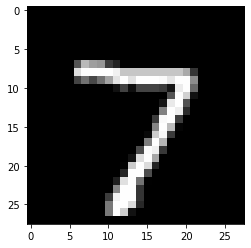

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [ ]:
X_test[0].shape

(784,)

In [ ]:
X_test[0].reshape(1,-1).shape

(1, 784)

In [ ]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 84ms/step


In [ ]:
encoded_image

array([[2.8097267 , 1.8480004 , 2.6838007 , 0.        , 0.        ,
        4.3997946 , 2.7950246 , 1.9698732 , 4.793026  , 4.016757  ,
        4.287978  , 3.5461032 , 3.741074  , 2.8900652 , 5.1058435 ,
        0.        , 0.86502385, 4.7857366 , 5.4065332 , 9.870083  ,
        8.361234  , 2.5484755 , 0.        , 5.041025  , 2.4490724 ,
        5.6654816 , 4.718768  , 4.776941  , 2.8448012 , 3.183555  ,
        8.951391  , 7.68375   ]], dtype=float32)

In [ ]:
encoded_image.shape

(1, 32)

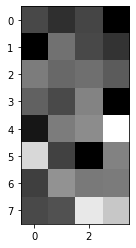

In [ ]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

### Decoding the images

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [ ]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs= decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 63ms/step


In [ ]:
decoded_image.shape

(1, 784)

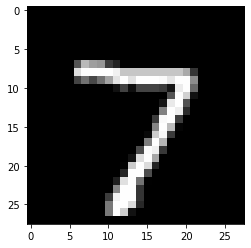

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray')

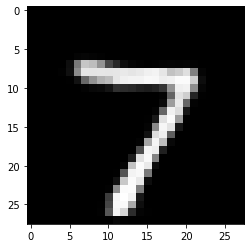

In [ ]:
plt.imshow(decoded_image.reshape(28,28), cmap = 'gray')

### Encoding and decoding the test images

In [ ]:
X_test.shape[0]

10000

1/1 [==============================] - 0s 25ms/step


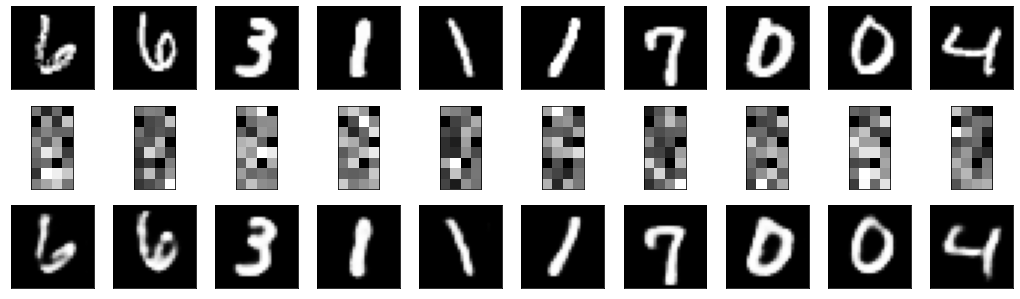

In [ ]:
n_images=10
test_images = np.random.randint(0,X_test.shape[0]-1, size =n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):

  #Original Image
  ax =plt.subplot(10,10,i+1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  #Coded Image
  ax =plt.subplot(10,10,i+1+n_images)
  encoded_image=encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  #Decoded Image
  ax =plt.subplot(10,10,i+1+n_images*2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

